In [298]:
# https://www.kaggle.com/c/titanic/data
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns 

In [299]:
def read_data():
    train = pd.read_csv('train.csv')
    test= pd.read_csv('test.csv')
    print('train:',np.shape(train))
    print('test:',np.shape(test))

    train['train_test'] = 1
    test['train_test'] = 0
    test['Survived'] = np.NaN
    all_data = pd.concat([train,test])
    print('all_data:',np.shape(all_data))
    return train, test, all_data

train: (891, 12)
test: (418, 11)


In [300]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [301]:
print(train.isna().sum())
print('\nshape:',np.shape(train))
print('\nany duplicates:',train.duplicated().any())
print('\ndata types:\n',train.dtypes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

shape: (891, 13)

any duplicates: False

data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
train_test       int64
dtype: object


In [302]:
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')

In [303]:
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
'''
for i in df_num.columns:
    fig = px.histogram(df_num[i], x = i)
    fig.show()
'''

'\nfor i in df_num.columns:\n    fig = px.histogram(df_num[i], x = i)\n    fig.show()\n'

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


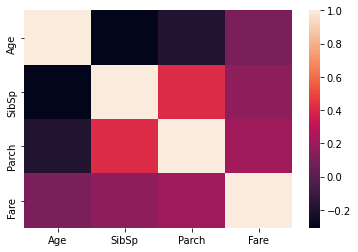

In [304]:
print(df_num.corr())
sns.heatmap(df_num.corr())
pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare']) # average age, parch, sibsp, fare per survived

In [305]:
df_cat_1 = ['Pclass','Sex','Embarked']

for cat in df_cat_1:
    print(pd.pivot_table(train, index = 'Survived', columns = [cat], values='Ticket', aggfunc='count'))
    print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [306]:
tmp_f = train.loc[train['Sex'] == 'female', :]
mean_f = tmp_f['Age'].mean()
print('Mean Age female : ', mean_f)
train.Age[train['Sex'] == 'female'] = train.Age[train['Sex'] == 'female'].fillna(mean_f)

tmp_m = train.loc[train['Sex'] == 'male', :]
mean_m = tmp_m['Age'].mean()
print('Mean Age male : ', mean_m)
train.Age[train['Sex'] == 'male'] = train.Age[train['Sex'] == 'male'].fillna(mean_m)

train.Fare = train.Fare.fillna(train.Fare.mean())
print('Mean Fare price : ', train.Fare.mean())

train.dropna(subset=['Embarked'], inplace = True)

Mean Age female :  27.915708812260537
Mean Age male :  30.72664459161148
Mean Fare price :  32.204207968574636


In [307]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
train_test       0
dtype: int64

In [308]:
# fig = px.histogram(train, x="Age", color="Survived", barmode='group')

surv = train.Age.loc[train['Survived'] == 1]
notSurv = train.Age.loc[train['Survived'] == 0]
surv_per_age = [surv, notSurv]

fig = ff.create_distplot(surv_per_age, ['Survived', 'Not Survived'], bin_size=.2)
fig.update_layout(title='Histogram survived by Age') 

fig

In [309]:
train['Surname'], train['Tmp'] =  train['Name'].str.split(',',1).str
train['Title'], train['Name'] = train['Tmp'].str.split('.',1).str
train['Title'] = train['Title'].str.replace(' ','')
train['Title'] = train['Title'].astype('category')
train['Title_'] = train['Title']
train['Title_'] = train['Title_'].replace(['Dr', 'Rev', 'Major', 'Col', 'Sir', 'Capt', 'Don'],'Mr')
train['Title_'] = train['Title_'].replace(['Mlle', 'Ms', 'Mme', 'Jonkheer', 'theCountess', 'Lady'], 'Mrs')

train['Cabin_1'] = train.Cabin.str.slice(0,1)
train['Cabin_2'] = train.Cabin.str.slice(1,)
train['Familysize'] = train['Parch'] + train['SibSp'] + 1

train.drop(['Cabin', 'Tmp'], inplace=True, axis =1)

<ipython-input-309-b3249f200506>:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

<ipython-input-309-b3249f200506>:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [310]:
print(train.Cabin_1.unique())
print(train.Title.unique())
print(train.Title.value_counts())
print(train.Title_.unique())
print(train.Title_.value_counts())

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['Mr', 'Mrs', 'Miss', 'Master', 'Don', ..., 'Mlle', 'Col', 'Capt', 'theCountess', 'Jonkheer']
Length: 17
Categories (17, object): ['Mr', 'Mrs', 'Miss', 'Master', ..., 'Col', 'Capt', 'theCountess', 'Jonkheer']
Mr             517
Miss           181
Mrs            124
Master          40
Dr               7
Rev              6
Major            2
Col              2
Mlle             2
Sir              1
Ms               1
Capt             1
Mme              1
Lady             1
Jonkheer         1
Don              1
theCountess      1
Name: Title, dtype: int64
['Mr', 'Mrs', 'Miss', 'Master']
Categories (4, object): ['Mr', 'Mrs', 'Miss', 'Master']
Mr        537
Miss      181
Mrs       131
Master     40
Name: Title_, dtype: int64


In [311]:
title_col = train.pop('Title')
title__col = train.pop('Title_')
surname_col = train.pop('Surname')
cabin_1_col = train.pop('Cabin_1')
cabin_2_col = train.pop('Cabin_2')
famsize_col = train.pop('Familysize')

train.insert(3, 'Title_', title__col)
train.insert(4, 'Title', title_col)
train.insert(6, 'Surname', surname_col)
train.insert(11, 'Familysize', famsize_col)
train.insert(13, 'Cabin_1', cabin_1_col)
train.insert(14, 'Cabin_2', cabin_2_col)

In [296]:
fig_1 = px.histogram(x=train['Title'], color=train['Survived'], 
            barmode= 'group')

fig_2 = px.histogram(x=train['Title_'], color=train['Survived'], 
            barmode= 'group')
fig_1

In [313]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,NaN


In [312]:
train

,PassengerId,Survived,Pclass,Title_,Title,Name,Surname,Sex,Age,SibSp,Parch,Familysize,Ticket,Cabin_1,Cabin_2,Fare,Embarked,train_test
0,1,0,3,Mr,Mr,Owen Harris,Braund,male,22.000000,1,0,2,A/5 21171,NaN,NaN,7.2500,S,1
1,2,1,1,Mrs,Mrs,John Bradley (Florence Briggs Thayer),Cumings,female,38.000000,1,0,2,PC 17599,C,85,71.2833,C,1
2,3,1,3,Miss,Miss,Laina,Heikkinen,female,26.000000,0,0,1,STON/O2. 3101282,NaN,NaN,7.9250,S,1
3,4,1,1,Mrs,Mrs,Jacques Heath (Lily May Peel),Futrelle,female,35.000000,1,0,2,113803,C,123,53.1000,S,1
4,5,0,3,Mr,Mr,William Henry,Allen,male,35.000000,0,0,1,373450,NaN,NaN,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Mr,Rev,Juozas,Montvila,male,27.000000,0,0,1,211536,NaN,NaN,13.0000,S,1
887,888,1,1,Miss,Miss,Margaret Edith,Graham,female,19.000000,0,0,1,112053,B,42,30.0000,S,1
888,889,0,3,Miss,Miss,"Catherine Helen ""Carrie""",Johnston,female,27.915709,1,2,4,W./C. 6607,NaN,NaN,23.4500,S,1
889,890,1,1,Mr,Mr,Karl Howell,Behr,male,26.000000,0,0,1,111369,C,148,30.0000,C,1


In [57]:
print('\ndata types:\n',train.dtypes)


data types:
 PassengerId       int64
Survived          int64
Pclass            int64
Title          category
Name             object
Surname          object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
train_test        int64
Cabin_1          object
Cabin_2          object
Familysize        int64
dtype: object


In [136]:
#del x_test

In [138]:
x = train
#y = x.pop('Survived')
x.drop(['PassengerId', 'Surname', 'Name', 'Ticket'], axis = 1)
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_1,Cabin_2,Familysize
0,3,Mr,male,22.000000,1,0,7.2500,S,NaN,NaN,2
1,1,Mrs,female,38.000000,1,0,71.2833,C,C,85,2
2,3,Miss,female,26.000000,0,0,7.9250,S,NaN,NaN,1
3,1,Mrs,female,35.000000,1,0,53.1000,S,C,123,2
4,3,Mr,male,35.000000,0,0,8.0500,S,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,Rev,male,27.000000,0,0,13.0000,S,NaN,NaN,1
887,1,Miss,female,19.000000,0,0,30.0000,S,B,42,1
888,3,Miss,female,27.915709,1,2,23.4500,S,NaN,NaN,4
889,1,Mr,male,26.000000,0,0,30.0000,C,C,148,1


In [110]:
print('\ndata types:\n',x.dtypes)


data types:
 PassengerId       int64
Pclass         category
Title          category
Name             object
Surname          object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
Cabin_1          object
Cabin_2          object
Familysize        int64
dtype: object


In [109]:
clf = RandomForestClassifier(n_estimators=100, verbose=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

ValueError: could not convert string to float: ' Miss'

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()